# 支持向量回归最突出的特征额就是加入了弹性部分

In [ ]:
['Unnamed: 0', 'longitude', 'latitude', 'housing_median_age',
       'total_rooms', 'total_bedrooms', 'population', 'households',
       'median_income', 'median_house_value', 'ocean_proximity', 'PRICE'],

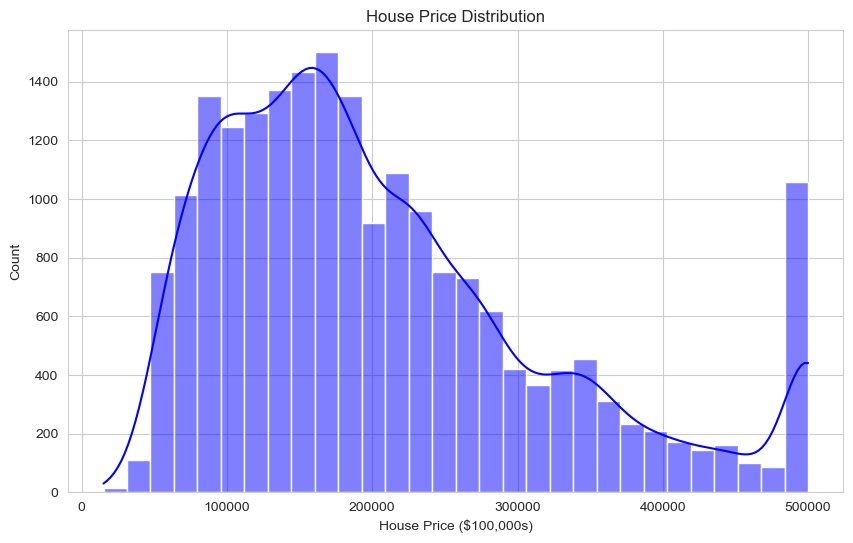

Best Parameters: {'C': 100, 'epsilon': 0.5, 'gamma': 'scale'}
MAE: 67728.978, RMSE: 94002.801, R^2: 0.326


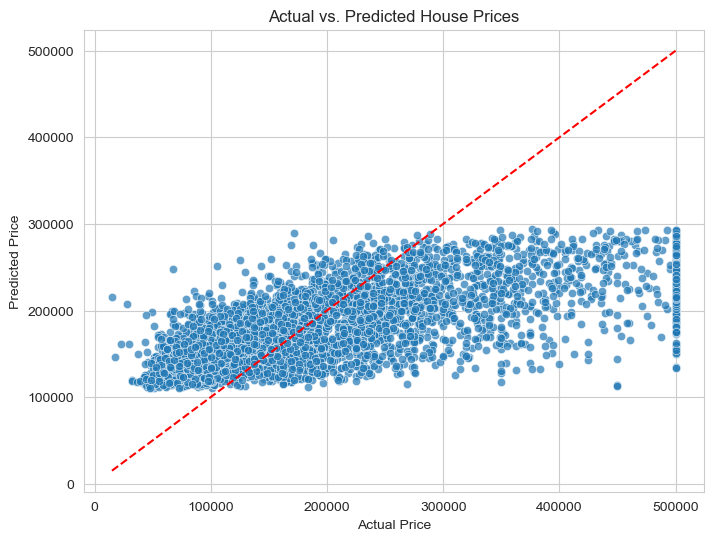

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

# 1. 加载California房价数据
housing = pd.read_csv("./california_housing.csv")
data = housing


# 2. 数据探索
plt.figure(figsize=(10, 6))
sns.histplot(data['median_house_value'], bins=30, kde=True, color='blue')
plt.xlabel('House Price ($100,000s)')
plt.ylabel('Count')
plt.title('House Price Distribution')
plt.show()

# 3. 选择特征和目标变量
X = data[['median_income', 'total_rooms', 'population', 'housing_median_age']]
y = data['median_house_value']

# 4. 数据划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. 数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. SVR 模型训练（使用 RBF 核）
svr = SVR(kernel='rbf')
param_grid = {
    'C': [1, 10, 100],
    'epsilon': [0.1, 0.2, 0.5],
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# 7. 预测与评估
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'MAE: {mae:.3f}, RMSE: {rmse:.3f}, R^2: {r2:.3f}')

# 8. 结果可视化
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted House Prices')
plt.show()

In [5]:
print(data.columns)

Index(['Unnamed: 0', 'longitude', 'latitude', 'housing_median_age',
       'total_rooms', 'total_bedrooms', 'population', 'households',
       'median_income', 'median_house_value', 'ocean_proximity', 'PRICE'],
      dtype='object')
